In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import nltk
from nltk.corpus import stopwords
import xgboost as xgb

In [2]:
# Load both travel and travel hack csv files
t_df = pd.read_csv('./travel_preprocessed_data.csv')
th_df = pd.read_csv('./travelhacks_preprocessed_data.csv')
# Combine them into one DataFrame
df = pd.concat([t_df, th_df], ignore_index=True)
# Save the merged DataFrame to a csv file
df.to_csv('combined_travel_data.csv', index=False)
print("Files merged successfully!")

Files merged successfully!


In [3]:
t_df.shape

(1103, 21)

In [4]:
th_df.shape

(1007, 21)

In [5]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,...,17,12,Monday,209,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr..."
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,...,17,0,Monday,317,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m..."
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,...,17,20,Monday,156,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche..."
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,...,17,16,Monday,154,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ..."
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,...,18,2,Tuesday,375,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2110 non-null   object
 1   created_utc          2110 non-null   object
 2   title                2110 non-null   object
 3   author               2032 non-null   object
 4   selftext             1431 non-null   object
 5   num_comments         2110 non-null   int64 
 6   score                2110 non-null   int64 
 7   subreddit            2110 non-null   object
 8   combined_text        2110 non-null   object
 9   year                 2110 non-null   int64 
 10  month                2110 non-null   int64 
 11  day                  2110 non-null   int64 
 12  hour                 2110 non-null   int64 
 13  day_of_week          2110 non-null   object
 14  text_length          2110 non-null   int64 
 15  combined_word_count  2110 non-null   int64 
 16  text_c

In [7]:
df.isna().sum()

id                       0
created_utc              0
title                    0
author                  78
selftext               679
num_comments             0
score                    0
subreddit                0
combined_text            0
year                     0
month                    0
day                      0
hour                     0
day_of_week              0
text_length              0
combined_word_count      0
text_category            0
cleaned_text             0
tokenized_text           0
bigrams                  0
trigrams                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2110 non-null   object
 1   created_utc          2110 non-null   object
 2   title                2110 non-null   object
 3   author               2032 non-null   object
 4   selftext             1431 non-null   object
 5   num_comments         2110 non-null   int64 
 6   score                2110 non-null   int64 
 7   subreddit            2110 non-null   object
 8   combined_text        2110 non-null   object
 9   year                 2110 non-null   int64 
 10  month                2110 non-null   int64 
 11  day                  2110 non-null   int64 
 12  hour                 2110 non-null   int64 
 13  day_of_week          2110 non-null   object
 14  text_length          2110 non-null   int64 
 15  combined_word_count  2110 non-null   int64 
 16  text_c

In [9]:
df['subreddit'].unique()

array(['travel', 'TravelHacks'], dtype=object)

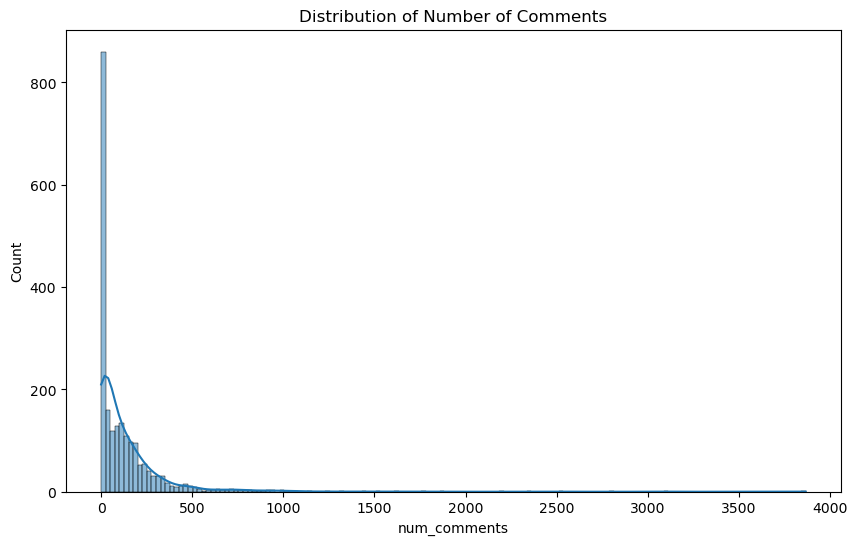

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(df['num_comments'], kde=True)
plt.title('Distribution of Number of Comments')
plt.show()






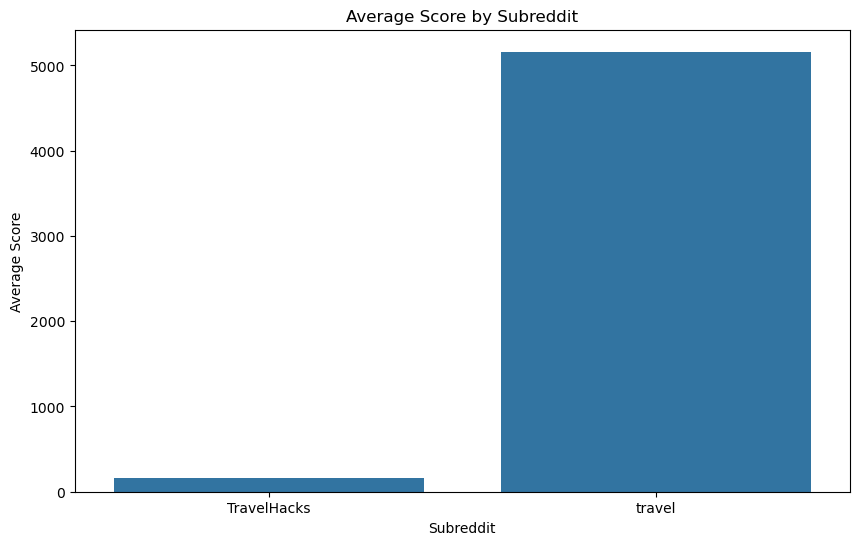

In [11]:
avg_score_by_subreddit = df.groupby('subreddit')['score'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_score_by_subreddit.index, y=avg_score_by_subreddit.values, ci=None)
plt.title('Average Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Score')
plt.show()


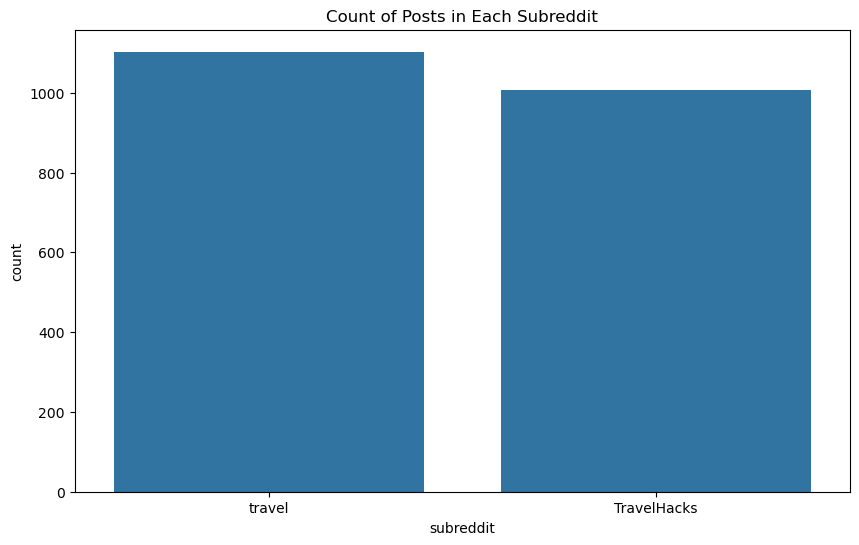

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=df)
plt.title('Count of Posts in Each Subreddit')
plt.show()

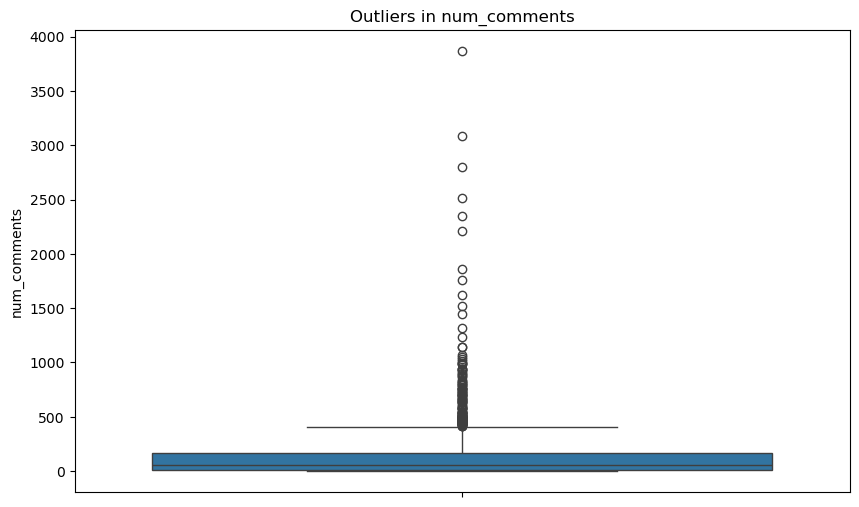

In [13]:
# Boxplots can help visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['num_comments'])
plt.title('Outliers in num_comments')
plt.show()

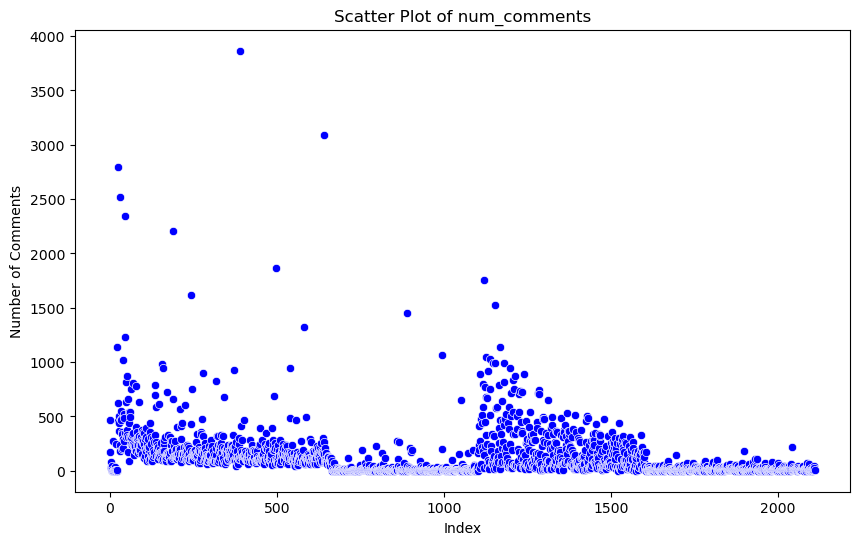

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['num_comments'], color='blue')
plt.title('Scatter Plot of num_comments')
plt.xlabel('Index')
plt.ylabel('Number of Comments')
plt.show()

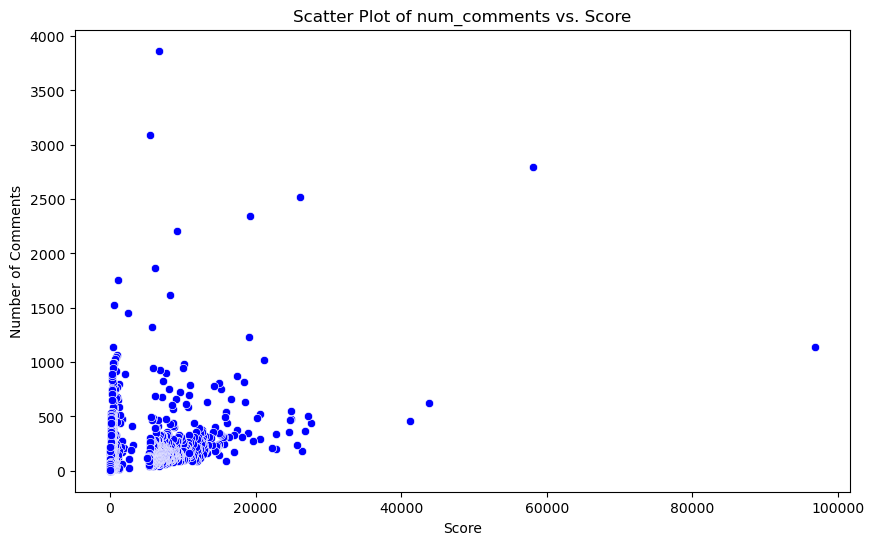

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['score'], y=df['num_comments'], color='blue')
plt.title('Scatter Plot of num_comments vs. Score')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.show()

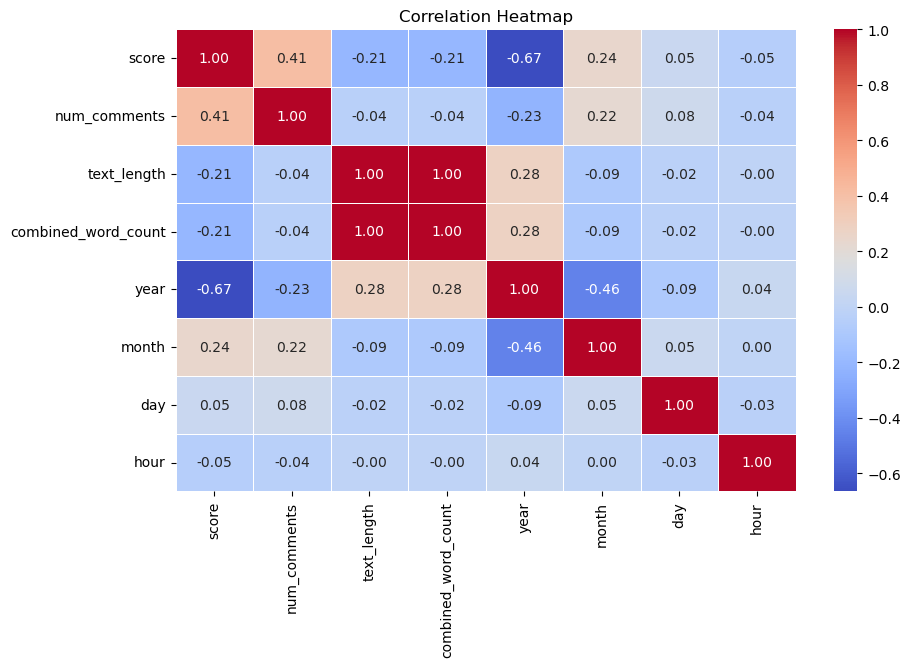

In [16]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['score', 'num_comments', 'text_length', 'combined_word_count', 'year', 'month', 'day', 'hour']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


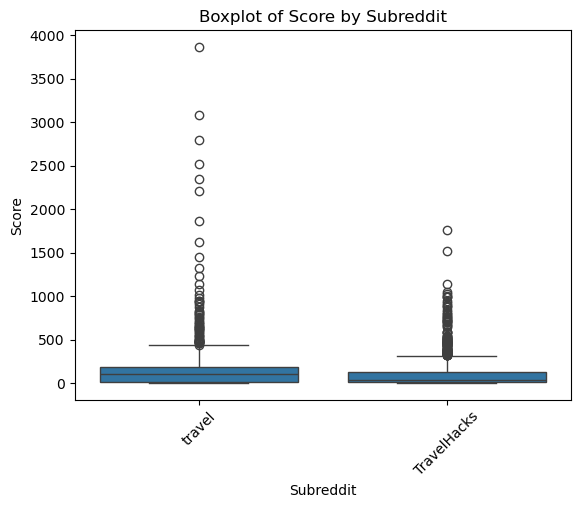

In [17]:
# Boxplot comparing scores across different subreddits
sns.boxplot(x='subreddit', y='num_comments', data=df)
plt.title('Boxplot of Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

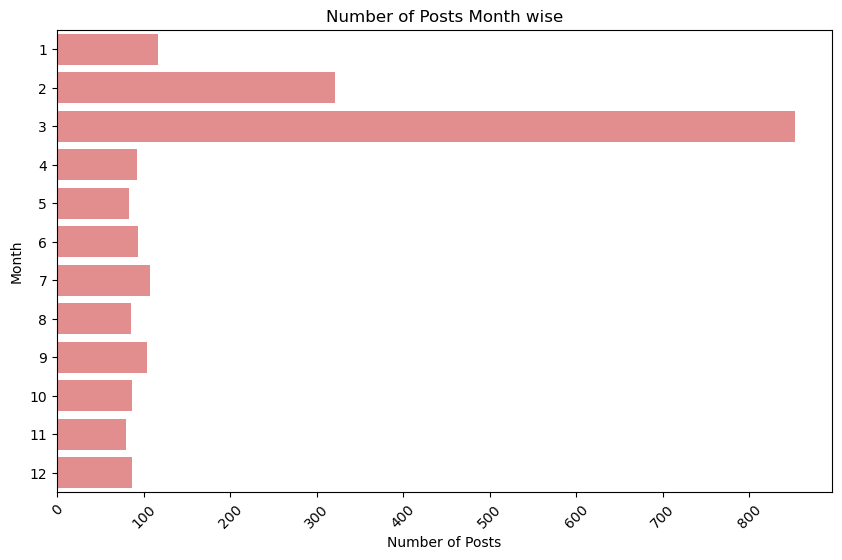

In [18]:
plt.figure(figsize=(10, 6))
monthly_posts = df['month'].value_counts().sort_index()
sns.barplot(x=monthly_posts.values, y=monthly_posts.index.astype(str), color='lightcoral', orient='h')
plt.title('Number of Posts Month wise')
plt.xlabel('Number of Posts')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()


In [19]:
df['subreddit'].unique()

array(['travel', 'TravelHacks'], dtype=object)

In [20]:
# Convert the 'subreddit' column to lowercase
df['subreddit'] = df['subreddit'].str.lower()
# Map 'travel' to 1 and 'travelhacks' to 0
df['subreddit'] = df['subreddit'].map({'travel': 1, 'travelhacks': 0})
# Convert 'subreddit' column to integer type
df['subreddit'] = df['subreddit'].astype(int)
# Display the DataFrame
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",2025,...,17,12,Monday,209,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr..."
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,2025,...,17,0,Monday,317,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m..."
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,2025,...,17,20,Monday,156,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche..."
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,2025,...,17,16,Monday,154,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ..."
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,2025,...,18,2,Tuesday,375,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa..."


In [21]:
df.isnull().sum()


id                       0
created_utc              0
title                    0
author                  78
selftext               679
num_comments             0
score                    0
subreddit                0
combined_text            0
year                     0
month                    0
day                      0
hour                     0
day_of_week              0
text_length              0
combined_word_count      0
text_category            0
cleaned_text             0
tokenized_text           0
bigrams                  0
trigrams                 0
dtype: int64

In [22]:
df['author'] = df['author'].fillna('unknown')

In [23]:
df.isnull().sum()

id                       0
created_utc              0
title                    0
author                   0
selftext               679
num_comments             0
score                    0
subreddit                0
combined_text            0
year                     0
month                    0
day                      0
hour                     0
day_of_week              0
text_length              0
combined_word_count      0
text_category            0
cleaned_text             0
tokenized_text           0
bigrams                  0
trigrams                 0
dtype: int64

In [24]:
df['selftext'] = df['selftext'].fillna('')

In [25]:
df.isnull().sum()

id                     0
created_utc            0
title                  0
author                 0
selftext               0
num_comments           0
score                  0
subreddit              0
combined_text          0
year                   0
month                  0
day                    0
hour                   0
day_of_week            0
text_length            0
combined_word_count    0
text_category          0
cleaned_text           0
tokenized_text         0
bigrams                0
trigrams               0
dtype: int64

In [26]:
# As a starting and simple model to predict posts comes from travel or travelhacks from which subreddit
#As a basemodel using Baseline Model: Logistic Regression with TF-IDF

#defind X and y
X = df['combined_text']
y = df['subreddit']





In [27]:
#checks for class balance
y.value_counts(normalize=True)

subreddit
1    0.522749
0    0.477251
Name: proportion, dtype: float64

In [28]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Vectorize text using TF-IDF
#using TfidfVectorizer(stop_words='english', ngram_range=(1, 1)) to converts text documents into numerical feature vectors using TF-IDF to capture the importance words 
#excluding common English stopwords.
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))

In [30]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [31]:
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [32]:
train_pred = model.predict(X_train_tfidf)       
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.9218009478672986

In [33]:
# baseline predictions
y_pred = model.predict(X_test_tfidf)

In [34]:
#generating reports
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.836735,0.815920,0.826196,201.000000
1,0.836283,0.855204,0.845638,221.000000
accuracy,0.836493,0.836493,0.836493,0.836493
macro avg,0.836509,0.835562,0.835917,422.000000
weighted avg,0.836498,0.836493,0.836378,422.000000


In [35]:
accuracy_score(y_test, y_pred)

0.8364928909952607

In [36]:
#iterated with ngram_range(1,2) and ngram_range(1,3) but it did not help to improve accuracy pretty less than base model
#so sticking with 1,1
#0.8364928909952607
#1,2
#0.8317535545023697
#1,3
#0.8364928909952607

In [37]:
#Model iteration 2

In [38]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# Fit the model using the training dataset
rf.fit(X_train_tfidf, y_train)




RandomForestClassifier(random_state=42)

In [40]:
#train dataset acuuracy
train_pred = rf.predict(X_train_tfidf) 
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.9994075829383886

In [41]:
# Make predictions on the test dataset
y_pred_rf = rf.predict(X_test_tfidf)

In [42]:
accuracy_score(y_test, y_pred_rf)

0.8080568720379147

In [43]:
# Generate the classification report as a dictionary
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
# Convert the dictionary into a pandas DataFrame
report_rf_df = pd.DataFrame(report_rf).transpose()
# Print the DataFrame to display the classification report
report_rf_df

,precision,recall,f1-score,support
0,0.760870,0.870647,0.812065,201.000000
1,0.864583,0.751131,0.803874,221.000000
accuracy,0.808057,0.808057,0.808057,0.808057
macro avg,0.812726,0.810889,0.807970,422.000000
weighted avg,0.815184,0.808057,0.807775,422.000000


In [44]:
#random forest model performs poorly and much lesser than my base model and accuracy score is much lesser
#0.7867298578199052

In [45]:
# Model iteration using GridSearchCV for hyperparameter tuning
#Define the model
rf = RandomForestClassifier(random_state=42)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)







Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END m

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [53]:
# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [54]:
# Use the best model
best_rf = grid_search.best_estimator_

In [55]:
#train dataset acuuracy
train_pred = best_rf.predict(X_train_tfidf) 
train_accuracy = accuracy_score(y_train, train_pred)

In [56]:
train_accuracy

0.9994075829383886

In [57]:
# Fit and evaluate the best model
y_pred_rf = best_rf.predict(X_test_tfidf)



In [58]:
accuracy_score(y_test, y_pred_rf)

0.8317535545023697

In [59]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.78      0.90      0.84       201\n           1       0.89      0.77      0.83       221\n\n    accuracy                           0.83       422\n   macro avg       0.84      0.83      0.83       422\nweighted avg       0.84      0.83      0.83       422\n'

In [60]:
# Generate the classification report as a dictionary
report_gv = classification_report(y_test, y_pred_rf, output_dict=True)
# Convert the dictionary into a pandas DataFrame
report_gv_df = pd.DataFrame(report_gv).transpose()
# Print the DataFrame to display the classification report
report_gv_df

,precision,recall,f1-score,support
0,0.780172,0.900498,0.836028,201.000000
1,0.894737,0.769231,0.827251,221.000000
accuracy,0.831754,0.831754,0.831754,0.831754
macro avg,0.837455,0.834864,0.831639,422.000000
weighted avg,0.840169,0.831754,0.831431,422.000000


In [61]:
#Random Forest model's accuracy before and after grid search and hyperparameter tuning the score of 0.781 still much lower than your base model (0.836) indicating Random Forest may not be the most suitable model for this travel/travelhacks subreddit dataset 

In [62]:
#Model iteration->trying to add numerical features

In [63]:
#vectorization and transforming combinex_text
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
# numerical features
X_numerical = df[['score', 'num_comments', 'text_length']]




In [64]:
# scaling numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
# y variable
y = df['subreddit']
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_numerical_scaled, y, test_size=0.2, random_state=42)







In [65]:

# Initialize the Logistic Regression model
model = LogisticRegression()

In [66]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Predict on the test set
y_pred = model.predict(X_test)

In [68]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8151658767772512
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       201
           1       0.98      0.66      0.79       221

    accuracy                           0.82       422
   macro avg       0.85      0.82      0.81       422
weighted avg       0.86      0.82      0.81       422



In [69]:
#score is improved compared to random forest classifier but still lower than base model
#since linear regression model score is better i am iterating by changing features

In [70]:
#combine numerical and categorical features

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
documents = df['combined_text'].fillna('')  
# vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_text = tfidf.fit_transform(documents)
#numerical features
X_numerical = df[['score', 'num_comments', 'text_length']].values
# scale numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
# Combine the TF-IDF features with the scaled numerical features using hstack
X_combined = hstack([X_text, X_numerical_scaled])


In [72]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [73]:
# Initialize Logistic Regression model
model = LogisticRegression()

In [74]:
#fit model
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
#predictions
y_pred = model.predict(X_test)

In [76]:
#scoring model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [77]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8388625592417062
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       201
           1       0.95      0.73      0.83       221

    accuracy                           0.84       422
   macro avg       0.86      0.84      0.84       422
weighted avg       0.86      0.84      0.84       422



In [78]:
#Accuracy: 0.8388625592417062 accuracy slightly better than base model when using logistic model 
#combining numerical and categorical features so i am not taking consideration of Random forest and 
#grid/hyper tuning
#Model iteration using 

In [79]:
#sentimental analysis

In [80]:
sa = SentimentIntensityAnalyzer()

In [81]:
# Calculate sentiment score using VADER
df['sentiment_score'] = df['combined_text'].apply(lambda text: sa.polarity_scores(text)['compound'])




In [82]:
#score for positve and negatives
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))



In [83]:

df[['combined_text', 'sentiment_score', 'sentiment']].head()

,combined_text,sentiment_score,sentiment
0,"We've got a free car to travel the USA, we'll ...",0.9845,Positive
1,Traveling for Work as Extremely Morbidly Obese...,-0.0115,Neutral
2,My experience getting TSA precheck (USA). Mayb...,-0.8515,Negative
3,What are some large/capital cities that are ac...,0.7882,Positive
4,Lost carry-on suitcase waiting for flight at C...,0.9653,Positive


In [84]:
subreddit_sentiment = df.groupby('subreddit')['sentiment_score'].agg(['mean', 'std', 'count'])


In [85]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams,sentiment_score,sentiment
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",2025,...,Monday,209,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr...",0.9845,Positive
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,2025,...,Monday,317,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m...",-0.0115,Neutral
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,2025,...,Monday,156,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche...",-0.8515,Negative
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,2025,...,Monday,154,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ...",0.7882,Positive
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,2025,...,Tuesday,375,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa...",0.9653,Positive


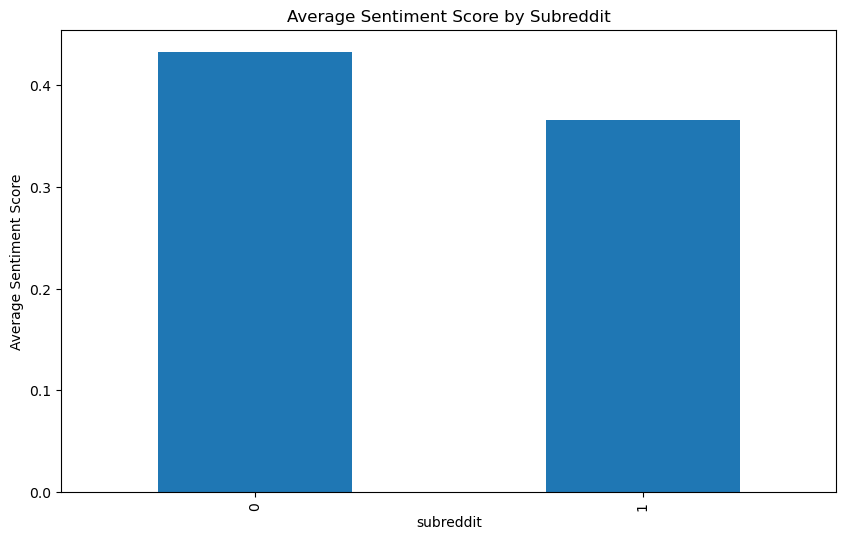

In [86]:
# visuals for sentiment average scores by subreddit
plt.figure(figsize=(10, 6))
subreddit_sentiment['mean'].plot(kind='bar', title='Average Sentiment Score by Subreddit')
plt.ylabel('Average Sentiment Score')
plt.show()

In [87]:
# Optionally, count the sentiment categories (Positive, Negative, Neutral) per subreddit
sentiment_counts = df.groupby(['subreddit', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts



sentiment,Negative,Neutral,Positive
subreddit,,,
0,190,62,755
1,122,315,666


<Figure size 1200x800 with 0 Axes>

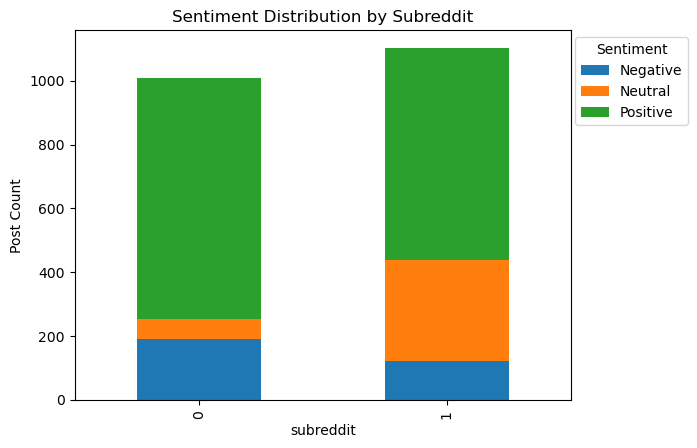

In [88]:
# visuals for sentiment counts per subreddit
plt.figure(figsize=(12,8))
sentiment_counts.plot(kind='bar', stacked=True, title='Sentiment Distribution by Subreddit')
plt.ylabel('Post Count')
plt.legend(title='Sentiment', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show();

In [89]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams,sentiment_score,sentiment
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",2025,...,Monday,209,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr...",0.9845,Positive
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,2025,...,Monday,317,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m...",-0.0115,Neutral
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,2025,...,Monday,156,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche...",-0.8515,Negative
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,2025,...,Monday,154,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ...",0.7882,Positive
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,2025,...,Tuesday,375,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa...",0.9653,Positive


In [90]:
#Finds potential places using NLTK (NNP, NNPS).->source from Google
def find_places(text):

    places = []
    try:
        tokens = nltk.word_tokenize(text)
        tagged = nltk.pos_tag(tokens)
        places = [word for word, tag in tagged if tag == 'NNP' or tag == 'NNPS']
    except TypeError:
        return places
    return places

# create places column in my dataframe
df['places'] = df['combined_text'].apply(find_places)

# Display the DataFrame with the new 'simple_places' column
print(df[['combined_text', 'places']].head())

                                       combined_text  \
0  We've got a free car to travel the USA, we'll ...   
1  Traveling for Work as Extremely Morbidly Obese...   
2  My experience getting TSA precheck (USA). Mayb...   
3  What are some large/capital cities that are ac...   
4  Lost carry-on suitcase waiting for flight at C...   

                                              places  
0  [USA, USA, Australia, LA, New, Orleans, Kansas...  
1    [Work, Morbidly, Obese, Required, ’, ’, Please]  
2        [TSA, USA, TSA, Staples, Has, TSA, Staples]  
3  [NYC, USA, London, UK, Paris, France, Berlin, ...  
4  [Chicago, O'Hare, So, Chicago, LA, American, C...  


In [91]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams,sentiment_score,sentiment,places
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",2025,...,209,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr...",0.9845,Positive,"[USA, USA, Australia, LA, New, Orleans, Kansas..."
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,2025,...,317,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m...",-0.0115,Neutral,"[Work, Morbidly, Obese, Required, ’, ’, Please]"
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,2025,...,156,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche...",-0.8515,Negative,"[TSA, USA, TSA, Staples, Has, TSA, Staples]"
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,2025,...,154,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ...",0.7882,Positive,"[NYC, USA, London, UK, Paris, France, Berlin, ..."
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,2025,...,375,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa...",0.9653,Positive,"[Chicago, O'Hare, So, Chicago, LA, American, C..."


In [92]:
#cleaning dataset to remove duplicates in places column->source google
def clean_places_column(df):
    def remove_duplicates_from_list(place_list):
        if isinstance(place_list, list):
            return list(dict.fromkeys(place_list))
        else:
            return []
    df['places'] = df['places'].apply(remove_duplicates_from_list)
    return df



In [93]:
df = clean_places_column(df)


In [94]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams,sentiment_score,sentiment,places
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",2025,...,209,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr...",0.9845,Positive,"[USA, Australia, LA, New, Orleans, Kansas, Col..."
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,2025,...,317,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m...",-0.0115,Neutral,"[Work, Morbidly, Obese, Required, ’, Please]"
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,2025,...,156,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche...",-0.8515,Negative,"[TSA, USA, Staples, Has]"
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,2025,...,154,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ...",0.7882,Positive,"[NYC, USA, London, UK, Paris, France, Berlin, ..."
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,2025,...,375,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa...",0.9653,Positive,"[Chicago, O'Hare, So, LA, American, TSA, Does]"


In [95]:
#removing unwanted words from places column using stopwords

def remove_stopwords_from_places(df):
    stop_words = set(stopwords.words('english'))
    def filter_place_list(place_list):
        if isinstance(place_list, list):
            return [place for place in place_list if place.lower() not in stop_words and isinstance(place, str)]
        else:
            return []
    df['places'] = df['places'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    df['places'] = df['places'].apply(filter_place_list)
    return df



In [96]:
df = remove_stopwords_from_places(df)
df['places'].head()

0    [USA, Australia, LA, New, Orleans, Kansas, Col...
1         [Work, Morbidly, Obese, Required, ’, Please]
2                                  [TSA, USA, Staples]
3    [NYC, USA, London, UK, Paris, France, Berlin, ...
4                 [Chicago, O'Hare, LA, American, TSA]
Name: places, dtype: object

In [97]:
df['places']

0       [USA, Australia, LA, New, Orleans, Kansas, Col...
1            [Work, Morbidly, Obese, Required, ’, Please]
2                                     [TSA, USA, Staples]
3       [NYC, USA, London, UK, Paris, France, Berlin, ...
4                    [Chicago, O'Hare, LA, American, TSA]
                              ...                        
2105                   [Flight, Price, Changes, Hello, ’]
2106                            [Currency, Mexico, Chase]
2107    [LAX, LHR, MUM, Virgin, Atlantic, Heathrow, Lo...
2108    [First/Business, Class, United, Singapore, Air...
2109    [Hello, Greece, US, Athens, Samos, Italy, Amal...
Name: places, Length: 2110, dtype: object

In [98]:
df.isna().sum()

id                     0
created_utc            0
title                  0
author                 0
selftext               0
num_comments           0
score                  0
subreddit              0
combined_text          0
year                   0
month                  0
day                    0
hour                   0
day_of_week            0
text_length            0
combined_word_count    0
text_category          0
cleaned_text           0
tokenized_text         0
bigrams                0
trigrams               0
sentiment_score        0
sentiment              0
places                 0
dtype: int64

In [99]:
#installed spaCy for advanced Natural Language Processing (NLP) in Python to recognize the location and places
#pip install spacy

In [100]:
import pandas as pd

def create_honeymoon_flag(df, text_column='combined_text', new_column='is_honeymoon'):
    df[new_column] = df[text_column].str.contains(r'\bhoneymoon\b', case=False, regex=True)
    return df


In [101]:
df = create_honeymoon_flag(df)
print(df[['combined_text', 'is_honeymoon']].head())

                                       combined_text  is_honeymoon
0  We've got a free car to travel the USA, we'll ...         False
1  Traveling for Work as Extremely Morbidly Obese...         False
2  My experience getting TSA precheck (USA). Mayb...         False
3  What are some large/capital cities that are ac...         False
4  Lost carry-on suitcase waiting for flight at C...         False


In [102]:
df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams,sentiment_score,sentiment,places,is_honeymoon
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,1,"We've got a free car to travel the USA, we'll ...",2025,...,209,Long,weve got a free car to travel the usa well be ...,"['weve', 'got', 'free', 'car', 'travel', 'usa'...","['weve got', 'got free', 'free car', 'car trav...","['weve got free', 'got free car', 'free car tr...",0.9845,Positive,"[USA, Australia, LA, New, Orleans, Kansas, Col...",False
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,1,Traveling for Work as Extremely Morbidly Obese...,2025,...,317,Long,traveling for work as extremely morbidly obese...,"['traveling', 'work', 'extremely', 'morbidly',...","['traveling work', 'work extremely', 'extremel...","['traveling work extremely', 'work extremely m...",-0.0115,Neutral,"[Work, Morbidly, Obese, Required, ’, Please]",False
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,1,My experience getting TSA precheck (USA). Mayb...,2025,...,156,Long,my experience getting tsa precheck usa maybe n...,"['experience', 'getting', 'tsa', 'precheck', '...","['experience getting', 'getting tsa', 'tsa pre...","['experience getting tsa', 'getting tsa preche...",-0.8515,Negative,"[TSA, USA, Staples]",False
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,1,What are some large/capital cities that are ac...,2025,...,154,Long,what are some largecapital cities that are act...,"['largecapital', 'city', 'actually', 'quite', ...","['largecapital city', 'city actually', 'actual...","['largecapital city actually', 'city actually ...",0.7882,Positive,"[NYC, USA, London, UK, Paris, France, Berlin, ...",False
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,1,Lost carry-on suitcase waiting for flight at C...,2025,...,375,Long,lost carryon suitcase waiting for flight at ch...,"['lost', 'carryon', 'suitcase', 'waiting', 'fl...","['lost carryon', 'carryon suitcase', 'suitcase...","['lost carryon suitcase', 'carryon suitcase wa...",0.9653,Positive,"[Chicago, O'Hare, LA, American, TSA]",False


In [103]:
#source google and geeks for geeks
import pandas as pd
import spacy
import json

nlp = spacy.load("en_core_web_sm")

def extract_locations_from_places_json(df):
    def get_locations(places_list):
        if isinstance(places_list, str):
            try:
                places_list = json.loads(places_list)
            except (ValueError, TypeError):
                return [] 
        if isinstance(places_list, list):
            locations = []
            for place in places_list:
                if isinstance(place, str):
                    doc = nlp(place)
                    locations.extend([ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]])
            return locations
        else:
            return []
    df['location'] = df['places'].apply(get_locations)
    return df

In [104]:
df = extract_locations_from_places_json(df)
print(df[['places', 'location']].head())

                                              places  \
0  [USA, Australia, LA, New, Orleans, Kansas, Col...   
1       [Work, Morbidly, Obese, Required, ’, Please]   
2                                [TSA, USA, Staples]   
3  [NYC, USA, London, UK, Paris, France, Berlin, ...   
4               [Chicago, O'Hare, LA, American, TSA]   

                                            location  
0  [USA, Australia, LA, Kansas, Colorado, Utah, A...  
1                                                 []  
2                                              [USA]  
3  [NYC, USA, London, UK, Paris, France, Berlin, ...  
4                                      [Chicago, LA]  


In [105]:
#source google

In [106]:
def extract_honeymoon_data(df):
    honeymoon_df = df[df['is_honeymoon'] == 1]
    def get_locations(places_list):
        if isinstance(places_list, str):
            places_list = json.loads(places_list)
        if isinstance(places_list, list):
            locations = []
            for place in places_list:
                if isinstance(place, str):
                    doc = nlp(place)
                    locations.extend([ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]])
            return locations
        else:
            return []
    honeymoon_df['location'] = honeymoon_df['places'].apply(get_locations)
    result_df = honeymoon_df[['location', 'sentiment_score']].copy()
    return result_df[result_df['location'].astype(bool)]

def plot_honeymoon_locations(result_df, top_n=10):
    locations = []
    scores = []
    for loc_list, score in zip(result_df['location'], result_df['sentiment_score']):
        for loc in loc_list:
            locations.append(loc)
            scores.append(score)
    plot_df = pd.DataFrame({'location': locations, 'sentiment_score': scores})

    # Sort and take top N
def plot_honeymoon_locations(result_df):
    locations = []
    scores = []
    for loc_list, score in zip(result_df['location'], result_df['sentiment_score']):
        for loc in loc_list:
            locations.append(loc)
            scores.append(score)
    plot_df = pd.DataFrame({'location': locations, 'sentiment_score': scores})
    plt.figure(figsize=(16, 10))
    plt.title('Sentiment Scores for Honeymoon Locations')
    sns.barplot(x='location', y='sentiment_score', data=plot_df, ci=None)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


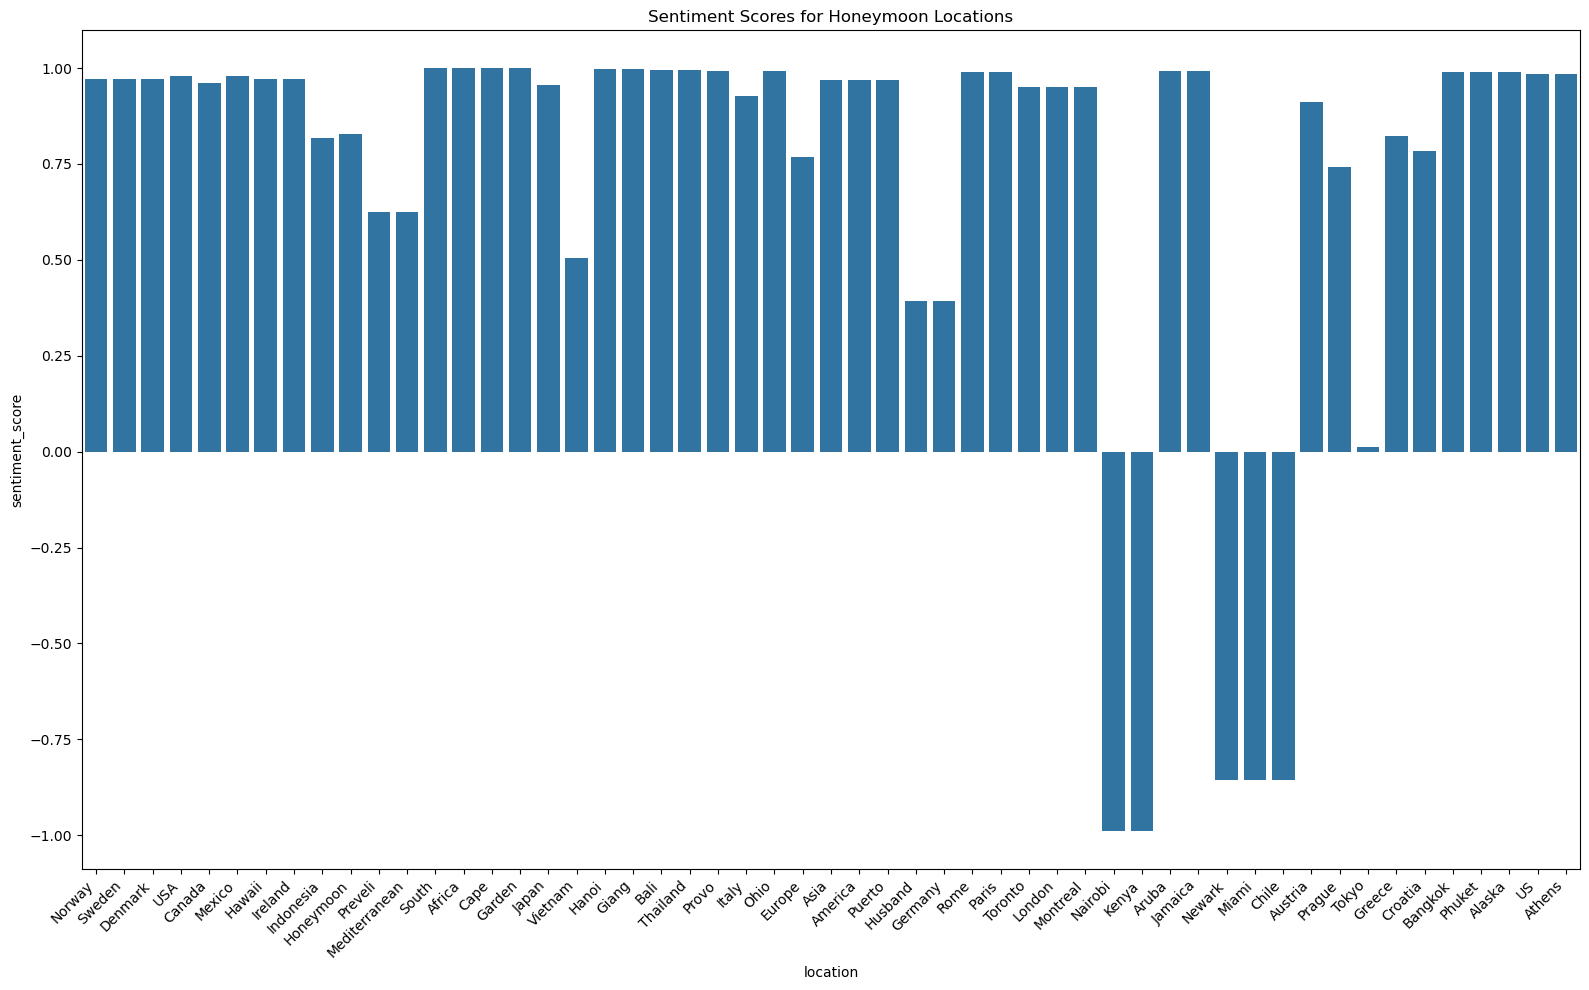

In [107]:
result_df = extract_honeymoon_data(df)
plot_honeymoon_locations(result_df)

In [110]:
df.columns

Index(['id', 'created_utc', 'title', 'author', 'selftext', 'num_comments',
       'score', 'subreddit', 'combined_text', 'year', 'month', 'day', 'hour',
       'day_of_week', 'text_length', 'combined_word_count', 'text_category',
       'cleaned_text', 'tokenized_text', 'bigrams', 'trigrams',
       'sentiment_score', 'sentiment', 'places', 'is_honeymoon', 'location'],
      dtype='object')

In [111]:
#ensamble model
documents = df['combined_text'].fillna('')
X_numerical = df[['score', 'num_comments', 'sentiment_score']]
# vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_text = tfidf.fit_transform(documents)
# Scaling
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
# combine numerical and categorical features
X_combined = hstack([X_text, X_numerical_scaled])
# target variable
y = df['subreddit']
#split train test dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# Instantiate model
logistic_model = LogisticRegression(random_state=42)
xgboost_model = xgb.XGBClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)


In [112]:
# Create the Voting Classifier
voting_model = VotingClassifier(estimators=[('lr', logistic_model), ('xgboost', xgboost_model), ('svm', svm)], voting='hard')

In [113]:
# Train the model
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_polic...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('svm', SVC(kernel='linear', random_state=42))])

In [114]:
y_train_pred=voting_model.predict(X_train)
accuracy_score(y_train,y_train_pred)
     

0.9662322274881516

In [115]:
# Predict on the test set
y_pred_voting = voting_model.predict(X_test)

In [116]:
# Evaluate the model
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.8625592417061612
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       201
           1       0.95      0.78      0.86       221

    accuracy                           0.86       422
   macro avg       0.87      0.87      0.86       422
weighted avg       0.88      0.86      0.86       422



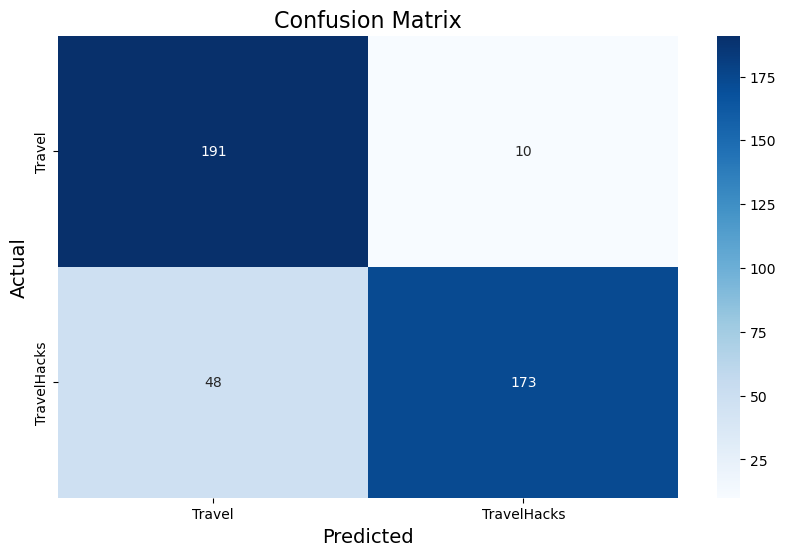

In [117]:
#since this is classification problem i am using confusion matrix
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Travel', 'TravelHacks'], yticklabels=['Travel', 'TravelHacks'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [118]:
#True Positive->Position in Matrix->Top-left corner->model correctly predicts a Travel post as Travel.
#False negative->position in matrix->Top right cornor->Travel posts that the model incorrectly predicted as TravelHacks.


In [119]:
#False positive->position in matrix->bottom left cornor->model incorrectly predictedTravelHacks posts as Travel 
#True Negative->position in matrix->bottom-right corner->TravelHacks posts correctly predicted as TravelHacks.


In [120]:
df.to_csv('Final Dataset for Modeling.csv', index=False)

In [121]:
#source geeks for geeks
#python -m spacy download en_core_web_lg

In [122]:
import pandas as pd
import spacy
import json

nlp = spacy.load("en_core_web_lg")  

def extract_location_data_spacy(df):
    def process_places(places_list):
        location_details = []

        if isinstance(places_list, str):
            try:
                places_list = json.loads(places_list)
            except (ValueError, TypeError):
                return []

        if isinstance(places_list, list):
            for place in places_list:
                if isinstance(place, str):
                    doc = nlp(place)
                    continent = None
                    country = None
                    city = None
                    place_name = None

                    for ent in doc.ents:
                        if ent.label_ == "GPE":  # Geopolitical Entity
                            if "," in place: #check for city, state/country format.
                                parts = [part.strip() for part in place.split(",")]
                                if len(parts) >= 2:
                                    last_part = nlp(parts[-1])
                                    second_last_part = nlp(parts[-2])
                                    if any(e.label_ == "GPE" for e in last_part.ents):
                                        if any(e.label_ == "GPE" for e in second_last_part.ents):
                                            city = parts[-2]
                                            country = parts[-1]
                                        else:
                                            city = parts[-1]
                                    else:
                                        city = ent.text
                                else:
                                    city = ent.text
                            else:
                                city = ent.text

                        elif ent.label_ == "LOC":  # Non-GPE locations
                            if not city:
                                place_name = ent.text

                    location_details.append({
                        "location": place,
                        "city": city,
                        "country": country,
                        "continent": continent, #spacy doesnt provide continent easily.
                        "place": place_name,
                    })

        return location_details

    df["location_details"] = df["places"].apply(process_places)
    return df



In [123]:
df = extract_location_data_spacy(df)
print(df['location_details'])

0       [{'location': 'USA', 'city': 'USA', 'country':...
1       [{'location': 'Work', 'city': None, 'country':...
2       [{'location': 'TSA', 'city': None, 'country': ...
3       [{'location': 'NYC', 'city': None, 'country': ...
4       [{'location': 'Chicago', 'city': 'Chicago', 'c...
                              ...                        
2105    [{'location': 'Flight', 'city': None, 'country...
2106    [{'location': 'Currency', 'city': None, 'count...
2107    [{'location': 'LAX', 'city': None, 'country': ...
2108    [{'location': 'First/Business', 'city': None, ...
2109    [{'location': 'Hello', 'city': None, 'country'...
Name: location_details, Length: 2110, dtype: object
